<h2>Basic Image Classification with TensorFlow</h2>

<h2>Task 1: Introduction</h2>

<h3>Import TensorFlow</h3>

In [ ]:
# use version 1.x
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using Tensorflow version', tf.__version__)

Using Tensorflow version 1.15.2


<h2>Import MNIST dataset</h2>

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# shapes of train and test sets

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


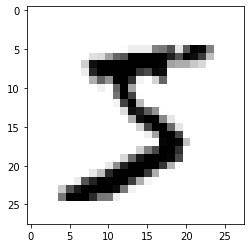

In [ ]:
# show image

from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [ ]:
# show labels

print(y_train[0])

# for all the labels in train set
print(set(y_train))

5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


<h2>Task 3: One Hot Encoding</h2>

<h5>original = 5, encoded = {0,0,0,0,0,1,0,0,0,0}</h5>

In [ ]:
# encode labels

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# validate shapes

print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [ ]:
# display encoded labels

y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

<h2>Task 4: Neural Networks</h2>

<h2>Task 5: Preprocessing</h2>

In [ ]:
# unrolling N-dimensional Arrays to Vectors

import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:
# display pixel values

print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
# data normalization

x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [ ]:
# show normalized pixel values

print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

<h2>Task 6: Creating a NN model</h2>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential ([
                     Dense(128, activation = 'relu', input_shape = (784,)),
                     Dense(128, activation = 'relu'),
                     Dense(10, activation = 'softmax')
])

In [ ]:
# compile model

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


<h2>Task 7: Training the Model</h2>

In [ ]:
# training

model.fit(x_train_norm, y_train_encoded, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3802 - acc: 0.8902
Epoch 2/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1825 - acc: 0.9468
Epoch 3/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1377 - acc: 0.9599


In [ ]:
# evaluate training

_, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('Test set accuracy: ', accuracy * 100)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.1328 - acc: 0.9600
Test set accuracy:  95.99999785423279


<h2>Task 8: Predictions</h2>

In [ ]:
# prediction on test shape

preds = model.predict(x_test_norm)

print('Shape of preds: ', preds.shape)

Shape of preds:  (10000, 10)


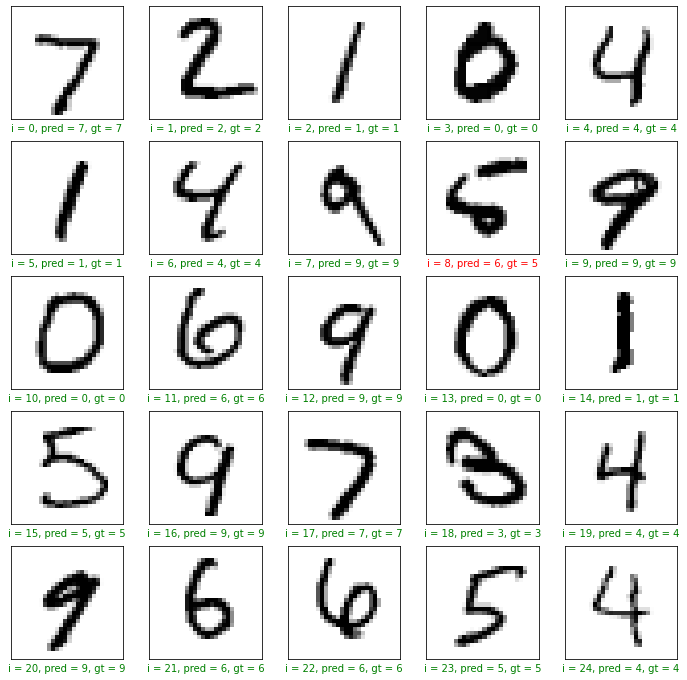

In [ ]:
# plott results

plt.figure(figsize = (12, 12))
start_index = 0

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index + i])
  gt = y_test[start_index + i]

  col = 'g'
  if pred != gt:
    col = 'r'

  plt.xlabel('i = {}, pred = {}, gt = {}'. format(start_index + i, pred, gt), color = col)
  plt.imshow(x_test [ start_index + i], cmap = 'binary')

plt.show()

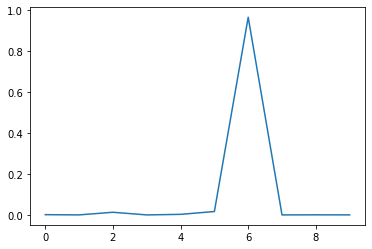

In [ ]:
# show predictions for the wrong classified

plt.plot(preds[8])
plt.show()